In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import random
import pandas as pd
import math

In D:\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In D:\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In D:\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In D:\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In D:\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.jpeg_quality rcparam was deprecated in M

In [28]:
def PV(F:float=1000, C:float=100, r:float=0.1, time:int=30, delta_t=1):
    V_coupons = calc_coupons(C, r, time, delta_t)
    V_face = calc_f(F, r, time)
    # return sum(V_coupons) + V_face
    return V_coupons + V_face

def PV1(hist, F:float=1000, C:float=100, r:float=0.1, time:int=30, delta_t=1):
    int_rates = []
    for _ in range(time):
        sample = random.random()
        int_rates.append(int_hist.ppf(sample)/100)
    V_coupons = calc_coupons1(C, int_rates, time, delta_t)
    V_face = calc_f1(F, int_rates, time)
    # return sum(V_coupons) + V_face
    return V_coupons + V_face

def calc_f(F:float=1000, r:float=0.1, time:int=30):
    V_face = F/((1+r)**time)
    return V_face

def calc_coupons(C: float, r: float, time: int, delta_t:int):
    V_coupons = C* (1-(1/(1+r)**time))/r
    return V_coupons

def calc_f1(F:float=1000, r:list = [0], time:int=30):
    denom = 1
    for i in r:
        denom *= (1+i) 
    V_face = F/denom
    return V_face

def calc_coupons1(C: float, r: list, time: int, delta_t:int):
    V_coupons = [0]
    for i in r:
        V_coupons.append(C/((1+i)))
    return sum(V_coupons)

def calc_coupons_exp(C: float, r: float, time: int, delta_t:int):
    PV = [0]
    for t in np.arange(0, time, delta_t):
        PV.append(C * np.exp(-r*t))
    return PV

def PV_exp(F=1000., C=100., r=0.1, time:int=30, delta_t=1.0):
    PV = 0
    for t in np.arange(0, time, delta_t):
        PV += C * np.exp(-r*t)
    PV += F*np.exp(-r*(time))
    return PV

In [4]:
def build_hist(array):
    n1 = int(1+3.3*np.log2(len(array)))
    bins = np.linspace((array.min()),(array.max()),n1)
    data = np.histogram(array, bins=bins)
    hist_dist = stats.rv_histogram(data)
    return hist_dist

def plot_chist(array, color='g'):
    n1 = int(1+3.3*np.log2(len(array)))
    n, bins, patches = plt.hist(array, n1, cumulative=True, density=True, facecolor=color, alpha=0.75)

def plot_hist(array, color='g'):
    n1 = int(1+3.3*np.log2(len(array)))
    n, bins, patches = plt.hist(array, n1, cumulative=False, density=False, facecolor=color, alpha=0.75)

In [5]:
print(PV(F=1000, C=100, r=0.1, time=5))
print(PV(F=1000, C=100, r=0.08, time=5))
print(PV(F=1000, C=100, r=0.12, time=5))

1000.0
1079.8542007415617
927.9044759530999


In [6]:
interest=pd.read_csv('interest_rates.csv')
main_int = np.array(interest['Total'])

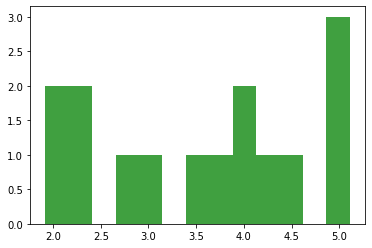

In [7]:
plot_hist(main_int)

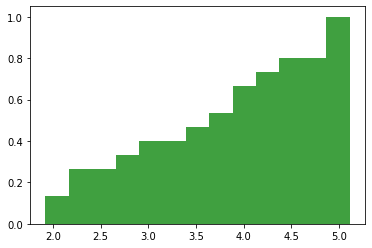

In [8]:
plot_chist(main_int)

In [13]:
int_hist=build_hist(main_int)
int_rates = []
for i in range(1000000):
    sample = random.random()
    int_rates.append(int_hist.ppf(sample))
int_rates = np.array(int_rates)
pvs = []
for r in int_rates:
    pvs.append(PV(F=1000, C=100, r=r/100, time=10))
x = np.array(pvs)
print(x.mean())

1539.5060057285464


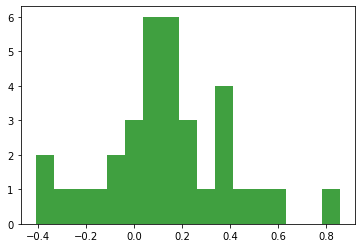

In [17]:
stocks=pd.read_csv('stock_returns.csv')
SP = np.array(stocks['SP'])
DOW = np.array(stocks['DOW'])
NAS = np.array(stocks['Nasdaq'])
runs = 10000
plot_hist(NAS)
#plot_chist(SP, color='b')

In [18]:
SP_hist=build_hist(SP)
sp_rates = np.zeros(runs)
samples = np.zeros(runs)
for i in range(runs):
    sample = random.random()
    sp_rates[i] = SP_hist.ppf(sample)
    samples[i] = SP_hist.cdf(sample)
pvs = []
test = []
for r in sp_rates:
    pvs.append(PV(F=1000, C=100, r=r, time=10))
    test.append(1000*(1+r)**10)
x = np.array(pvs)
test = np.array(test)
print(x.mean())

4353.02577197481


In [19]:
DOW_hist=build_hist(DOW)
dow_rates = np.zeros(runs)
samples = np.zeros(runs)
for i in range(runs):
    sample = random.random()
    dow_rates[i] = (DOW_hist.ppf(sample))
    samples[i] = DOW_hist.cdf(sample)
pvs = []
for r in dow_rates:
    pvs.append(PV(F=1000, C=100, r=r, time=10))
x = np.array(pvs)
print(x.mean())

3094.3059620423323


In [20]:
NAS_hist=build_hist(NAS)
nas_rates = np.zeros(runs)
samples = np.zeros(runs)
for i in range(runs):
    sample = random.random()
    nas_rates[i] = NAS_hist.ppf(sample)
    samples[i] = NAS_hist.cdf(sample)
pvs = []
for r in nas_rates:
    pvs.append(PV(F=1000, C=100, r=r, time=10))
x = np.array(pvs)
print(x.mean())

10946.166403507972


No handles with labels found to put in legend.


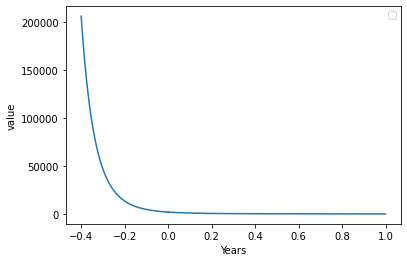

In [22]:
m = []
m3 = []
ran = np.arange(-0.4, 1.0, .001)
for r in ran:
    m.append(PV(C=100, r=r, time=10, delta_t=1))
plt.xlabel('Years')
plt.ylabel('value')
plt.plot(ran, m)
plt.legend()

In [42]:
interest=pd.read_csv('interest_rates.csv')
main_int = np.array(interest['Total'])
int_hist=build_hist(main_int)
pv_vals = []
for _ in range(100):
    pv_vals.append(PV1(int_hist, 1000, 20))
pv_vals = np.array(pv_vals)
pv_vals.mean()

930.6536565656816